# Logistic Regression Assignment

## Problem Statement:

## Solution:

In [1]:
#import required packages
import pandas as pd
import numpy as np

In [2]:
#read data
df_adv=pd.read_csv("advertising.csv")
df_adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Data Preprocessing

In [3]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df_adv.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
df_adv.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
df_adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
cat_cols=df_adv.describe(include=['object']).columns.tolist()
num_cols=df_adv.describe(include=['float64','int64']).columns.tolist()

In [8]:
df_adv.loc[:,cat_cols].isnull().sum()

Ad Topic Line    0
City             0
Country          0
Timestamp        0
dtype: int64

In [9]:
df_adv['Timestamp']=pd.to_datetime(df_adv.Timestamp)

In [10]:
df_adv.set_index('Timestamp',inplace=True)

In [11]:
df_adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad
Timestamp,,,,,,,,,
2016-03-27 00:53:11,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0
2016-04-04 01:39:02,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0
2016-03-13 20:35:42,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0
2016-01-10 02:31:19,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0
2016-06-03 03:36:18,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0


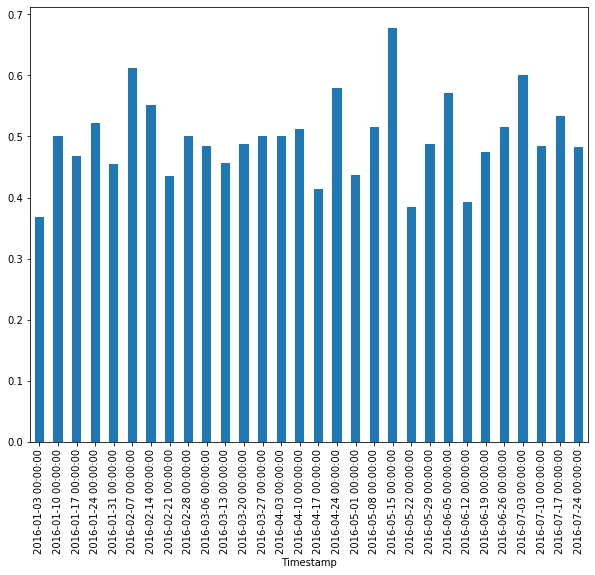

In [12]:
df_adv.resample('W')['Clicked on Ad'].mean().plot(kind='bar',figsize=(10,8))

In [13]:
plt.figure(figsize=(12,8))
sns.lineplot(x=df_adv.index,y=df_adv['Daily Time Spent on Site'],data=df_adv)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
df_adv.Age.value_counts().nlargest(n=10)

## EDA

In [ ]:
#Daily time spend wise Country and city
df_adv.groupby(by=['City'])['Daily Internet Usage'].mean().nlargest(n=10)

In [ ]:
sns.(data=df_adv.Age,vertical=False,color='g')
plt.show()

In [ ]:
df_adv.Age.hist(bins=5,figsize=(10,8))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#pd.crosstab(index=df_adv['Country'],columns=df_adv.City,values=df_adv.loc[:, ['Daily Internet Usage']],aggfunc='mean').fillna(0)

In [ ]:
df_adv.columns

In [ ]:
def Univirate_Analysis(df_adv,x,y):
    plt.figure(figsize=(12,8))
    plt.bar(x=x,height=y,data=df_adv)
    plt.show()

In [ ]:
Univirate_Analysis(df_adv=df_adv,x='Age',y='Area Income')

## Feature Engineering 

In [ ]:
df_adv.head()

In [ ]:
df_adv.loc[:,num_cols].head()

In [ ]:
#Check Imbalance data
df_adv['Clicked on Ad'].value_counts()

In [ ]:
#Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_sc=MinMaxScaler()

In [ ]:
df_scale=min_max_sc.fit_transform(df_adv.loc[:,num_cols])

In [ ]:
df_scale=pd.DataFrame(data=df_scale,columns=num_cols)

In [ ]:
df_scale.head()

In [ ]:
min_max_sc.inverse_transform(df_scale)

In [ ]:
num_cols

In [ ]:
#split data into training set and test set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Create object of Logistic regression
lr=LogisticRegression()

In [ ]:
X=df_scale.loc[:,['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male',]]
y=df_scale.loc[:,'Clicked on Ad']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
y_train.head()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
list(lr.coef_[0])

In [ ]:
pred=lr.predict(X_test)

In [ ]:
df_features_imp=pd.DataFrame({"Feature_name":X_test.columns.tolist(),"Feature_imp":list(lr.coef_[0])})

In [ ]:
df_features_imp.sort_values(by='Feature_imp',ascending=False)

In [ ]:
df_adv[['Clicked on Ad','Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male']].corr()

In [ ]:
y_pred_prob=lr.predict_proba(X_test)

In [ ]:
#Create data frame
df_pred=pd.DataFrame(data={'Actual': list(y_test),'Pred': list(pred)},index=y_test.index)

In [ ]:
len(y_train)

In [ ]:
df_pred

In [ ]:
X_test

In [ ]:
df_prediction=pd.concat([X_test,df_pred],axis=1,join='inner')

In [ ]:
df_prediction.head()

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(y_test,pred)

In [ ]:
metrics.accuracy_score(y_test,pred)

In [ ]:
print(metrics.classification_report(y_test,pred))

In [ ]:
metrics.roc_auc_score(y_test,pred)